In [1]:
import pandas as pd
import numpy as np
import random
import math
from copy import deepcopy
import random
import matplotlib.pyplot as plt

In [2]:
'''
Method to calculate the Eucledian Distance
'''

def distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [3]:
def kmeans(df, k):
    df = df.iloc[:,:-1]
    iterations = {}
    for time in range(10):
        max_itr = 100
        clusters = {}
        centroids = np.zeros((k,df.shape[1]))
        C_index = random.sample(range(df.shape[0]), k)
        C = df.values[C_index, :]
        _c = np.zeros(C.shape)

        itr = 0
        while(distance(C,_c, None) > 0.0001):
            for i in range(k):
                clusters[i] = []

            if itr == max_itr:
                break

            for i in range(df.shape[0]):
                assigned_cluster = np.argmin(distance(df.values[i,:], C))
                clusters[assigned_cluster].append(i)

            _c = deepcopy(C)

            for i in range(k):
                C[i] = np.mean(df.values[clusters[i]], axis = 0)

            itr += 1

        '''
        Calculating Objective Function for each round and picking the Clustering with the best 
        Obj funcion.
        '''
        L = 0
        for i in range(k):
            temp_data = df.values[clusters[i], :]
    #         print(temp_data.shape)
            for j in range(temp_data.shape[0]):
                L += math.pow(distance(temp_data[j], C[i], ax=0),2)
        iterations[L] = clusters
    min_itr = min(iterations.keys())

    col = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(10,10))
    for i in range(k):
        temp = df.iloc[iterations[min_itr][i]]    
        plt.scatter(temp.values[:,0], temp.values[:,1], c=col[i])
        plt.xlabel("Feature 0")
        plt.ylabel("Feature 1")
        plt.title("Clustering Using Kmeans Algorithm")
    plt.show()

In [4]:
df_1 = pd.read_csv('Dataset_1.csv', names = ['a','b','c'])
df_2 = pd.read_csv('Dataset_2.csv', names = ['a','b','c'])
df_3 = pd.read_csv('Dataset_3.csv', names = ['a','b','c'])

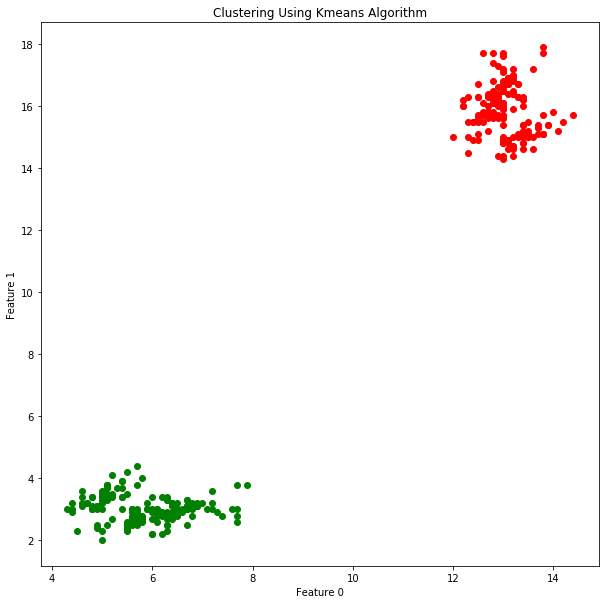

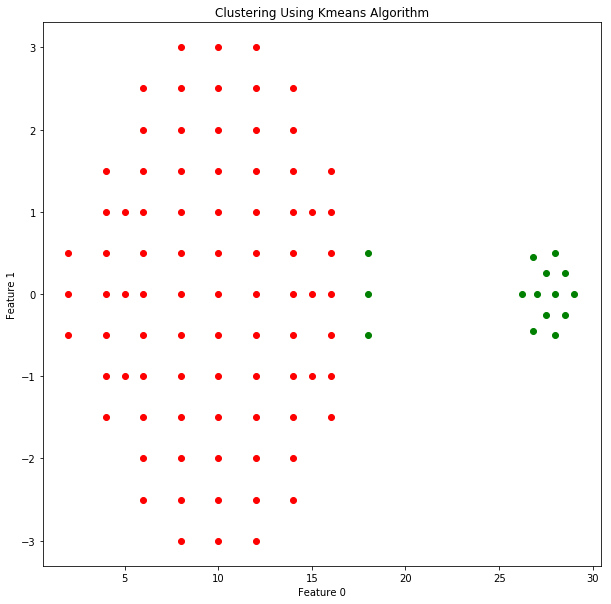

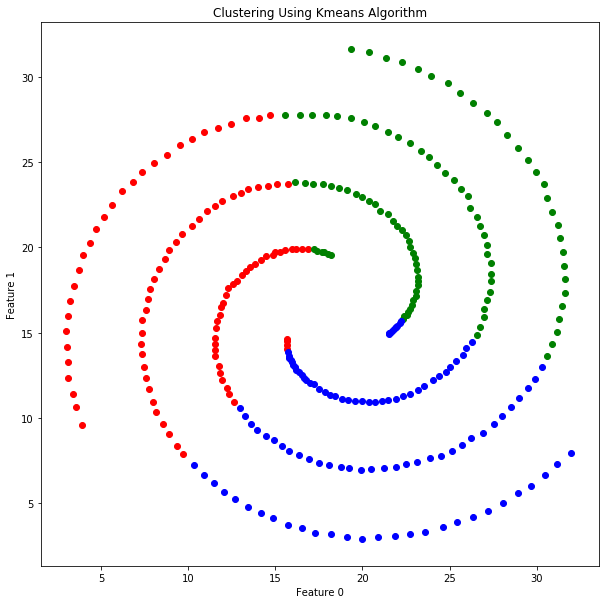

In [5]:
kmeans(df_1, 2)
kmeans(df_2, 2)
kmeans(df_3, 3)